# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('chained_assignment',None)

# Import data

In [2]:
fpath_listings_detailed = '../SanDiego/listings_detailed.csv'

list_df = pd.read_csv(fpath_listings_detailed)
print list_df.shape

(6608, 95)


# Designate Features

In [3]:
features = ['price','property_type','room_type','accommodates','bathrooms',
            'bedrooms','beds','neighbourhood_cleansed','latitude','longitude',
            'amenities']

pre_df = list_df[features]
print pre_df.shape
pre_df.head()

(6608, 11)


,price,property_type,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed,latitude,longitude,amenities
0,$49.00,House,Private room,2,1.0,1.0,1.0,Amphitheater And Water Park,32.581882,-117.001940,"{TV,""Wireless Internet"",Heating,""Family/Kid Fr..."
1,$59.00,Condominium,Private room,2,1.0,1.0,1.0,East Lake,32.653029,-116.976812,"{Internet,""Wireless Internet"",""Air Conditionin..."
2,$150.00,Condominium,Entire home/apt,6,2.5,3.0,3.0,East Lake,32.661477,-116.971813,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
3,$120.00,Townhouse,Entire home/apt,4,1.5,2.0,3.0,Eastlake Trails,32.638694,-116.951252,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."
4,$70.00,House,Private room,2,1.0,1.0,1.0,Eastlake Vistas,32.638942,-116.938891,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po..."


# Clean Up Features

In [6]:
def amenity_list(x):
    amenities_str = x.replace('"','').replace('{','').replace('}','')
    amenities_list = amenities_str.split(',')
    return amenities_list

def price_to_float(x):
    x = x.replace('$','')
    x = x.replace(',','')
    return float(x)

pre_df['amenities'] = pre_df['amenities'].apply(amenity_list)
pre_df['price'] = pre_df['price'].apply(price_to_float)

print pre_df.shape
pre_df.head()

(6608, 11)


,price,property_type,room_type,accommodates,bathrooms,bedrooms,beds,neighbourhood_cleansed,latitude,longitude,amenities
0,49.0,House,Private room,2,1.0,1.0,1.0,Amphitheater And Water Park,32.581882,-117.001940,"[TV, Wireless Internet, Heating, Family/Kid Fr..."
1,59.0,Condominium,Private room,2,1.0,1.0,1.0,East Lake,32.653029,-116.976812,"[Internet, Wireless Internet, Air Conditioning..."
2,150.0,Condominium,Entire home/apt,6,2.5,3.0,3.0,East Lake,32.661477,-116.971813,"[TV, Cable TV, Wireless Internet, Air Conditio..."
3,120.0,Townhouse,Entire home/apt,4,1.5,2.0,3.0,Eastlake Trails,32.638694,-116.951252,"[TV, Cable TV, Internet, Wireless Internet, Ki..."
4,70.0,House,Private room,2,1.0,1.0,1.0,Eastlake Vistas,32.638942,-116.938891,"[TV, Cable TV, Internet, Wireless Internet, Po..."


In [12]:
# get dummies
# pre_df = pd.get_dummies(pre_df)

# get binary
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

In [31]:
X = mlb.fit_transform(pre_df.amenities)
print X.shape
print mlb.classes_
a_df = pd.DataFrame(X, columns=mlb.classes_)

# remove the weird columns
#a_df.drop('')
a_df.drop('translation missing: en.hosting_amenity_49', axis=1, inplace=True)
a_df.drop('translation missing: en.hosting_amenity_50', axis=1, inplace=True)

print a_df.columns

a_df.head()

(6608, 43)
['' '24-Hour Check-in' 'Air Conditioning' 'Breakfast'
 'Buzzer/Wireless Intercom' 'Cable TV' 'Carbon Monoxide Detector' 'Cat(s)'
 'Dog(s)' 'Doorman' 'Dryer' 'Elevator in Building' 'Essentials'
 'Family/Kid Friendly' 'Fire Extinguisher' 'First Aid Kit'
 'Free Parking on Premises' 'Gym' 'Hair Dryer' 'Hangers' 'Heating'
 'Hot Tub' 'Indoor Fireplace' 'Internet' 'Iron' 'Kitchen'
 'Laptop Friendly Workspace' 'Lock on Bedroom Door' 'Other pet(s)'
 'Pets Allowed' 'Pets live on this property' 'Pool' 'Safety Card' 'Shampoo'
 'Smoke Detector' 'Smoking Allowed' 'Suitable for Events' 'TV' 'Washer'
 'Wheelchair Accessible' 'Wireless Internet'
 'translation missing: en.hosting_amenity_49'
 'translation missing: en.hosting_amenity_50']
Index([u'', u'24-Hour Check-in', u'Air Conditioning', u'Breakfast',
       u'Buzzer/Wireless Intercom', u'Cable TV', u'Carbon Monoxide Detector',
       u'Cat(s)', u'Dog(s)', u'Doorman', u'Dryer', u'Elevator in Building',
       u'Essentials', u'Family/Kid Fr

,,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Wheelchair Accessible,Wireless Internet
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,1,1,1,0,0,0,0,0,1
2,0,0,1,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,1,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,1
4,0,1,0,1,0,1,0,0,0,0,...,1,1,1,1,0,1,1,1,0,1


In [36]:
print type(a_df.columns[0])
print a_df.columns

<type 'str'>
Index([u'', u'24-Hour Check-in', u'Air Conditioning', u'Breakfast',
       u'Buzzer/Wireless Intercom', u'Cable TV', u'Carbon Monoxide Detector',
       u'Cat(s)', u'Dog(s)', u'Doorman', u'Dryer', u'Elevator in Building',
       u'Essentials', u'Family/Kid Friendly', u'Fire Extinguisher',
       u'First Aid Kit', u'Free Parking on Premises', u'Gym', u'Hair Dryer',
       u'Hangers', u'Heating', u'Hot Tub', u'Indoor Fireplace', u'Internet',
       u'Iron', u'Kitchen', u'Laptop Friendly Workspace',
       u'Lock on Bedroom Door', u'Other pet(s)', u'Pets Allowed',
       u'Pets live on this property', u'Pool', u'Safety Card', u'Shampoo',
       u'Smoke Detector', u'Smoking Allowed', u'Suitable for Events', u'TV',
       u'Washer', u'Wheelchair Accessible', u'Wireless Internet'],
      dtype='object')


# Scikit Learn

In [6]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Shuffle - Train/Validation/Test split

In [7]:
# shuffle
train_df, validate_df, test_df = np.split(pre_df.sample(frac=1, random_state=1),
                                          [int(.6*len(pre_df)), int(.8*len(pre_df))])
print train_df.shape
print validate_df.shape
print test_df.shape

(3955, 127)
(1319, 127)
(1319, 127)


In [8]:
cols = list(pre_df.columns)
target = 'price'
features = [col for col in cols if col != target]
#print cols
#print target
#print features

In [9]:
X = train_df[features]
y = np.ravel(train_df[target])
print X.shape
print y.shape

(3955, 126)
(3955,)


# Simple Random Forest Classifier

0.672871933311


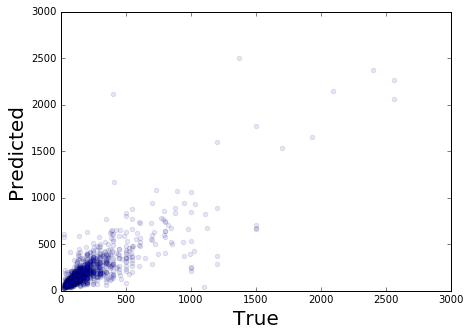

In [10]:
X_train = train_df[features]
y_train = np.ravel(train_df[target])
X_test = test_df[features]
y_test = np.ravel(test_df[target])

model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
y_prediction = model.fit(X_train, y_train).predict(X_test)
r2 = r2_score(y_test, y_prediction)
print r2

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(y_test, y_prediction, alpha=0.1)
ax.set_xlabel('True',fontsize=20)
ax.set_ylabel('Predicted',fontsize=20)
ax.set_xlim([0,3000])
ax.set_ylim([0,3000])
plt.show()

# Cross Validation

In [11]:
kf = KFold(y, n_folds=folds)

for train_index, test_index in kf:
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    mod_prediction = model.fit(X_train, Y_train).predict(X_test)

NameError: name 'folds' is not defined

# Model